<a href="https://colab.research.google.com/github/TianB33/COMP551Miniprojects/blob/main/551_hw1_dataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Below is the colab directory of Wine dataset related programs.

## Task 1: Acquire, preprocess, and analyze the data

### Read the CSV

In [13]:
import numpy as np
import pandas as pd
import csv

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

column_names = [
    "Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium",
    "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins",
    "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"
]

wine_df = pd.read_csv(url, names=column_names)
display(wine_df)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Checking the missing values


In [14]:
missing_values = wine_df.isnull().any(axis=1)
missing_data = wine_df[missing_values]

miss_ques = wine_df.eq('?').any(axis = 1)
missing_data_q = wine_df[miss_ques]
print(missing_data)
print(missing_data_q)

Empty DataFrame
Columns: [Class, Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, Proline]
Index: []
Empty DataFrame
Columns: [Class, Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, Proline]
Index: []


### Dataset statistics rendering

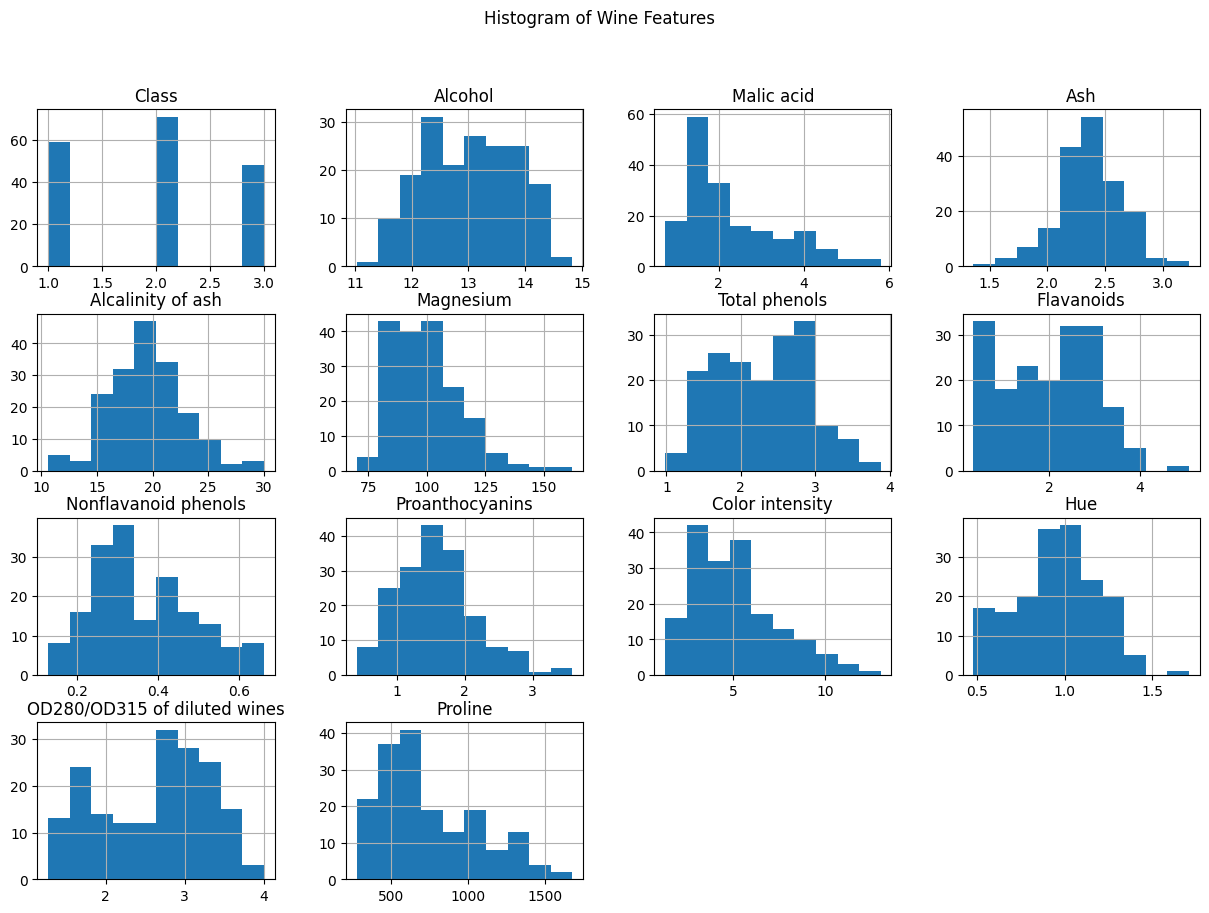

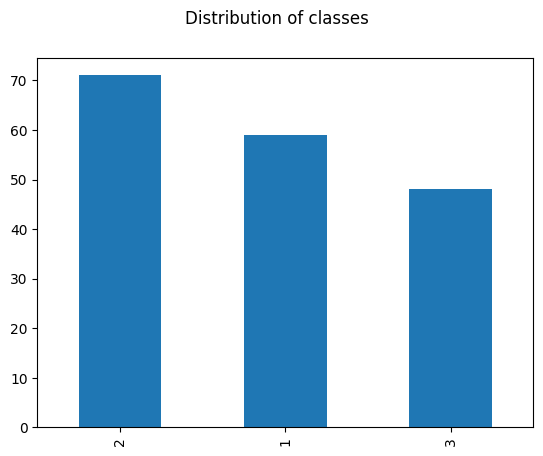

In [15]:
import matplotlib.pyplot as plt

numerical_summary = wine_df.describe()
class_distribution = wine_df['Class'].value_counts()
wine_df.hist(figsize=(15, 10))
plt.suptitle('Histogram of Wine Features')
plt.show()

class_distribution.plot(kind='bar')
plt.suptitle('Distribution of classes')
plt.show()
# target is 'class'

## Task 2: Implement the models

### Model Implementation

In [16]:
import seaborn as sns
import numpy as np

x_set = wine_df.drop('Class', axis=1).values
y_set = wine_df['Class'].values
print(x_set.shape)
print(y_set.shape)

(178, 13)
(178,)


In [17]:
class SoftmaxRegression:
    def __init__(self, num_class, lr=0.0001, max_epoch=5000, epsilon=0.01, use_SGD=False, batchsize=32, momentum=0, seed=42):
        # init all the parameters of the model
        self.lr = lr                                    # Learning rate
        self.max_epoch = max_epoch                      # Max number of iterations
        self.seed = seed                                # Seed for random number generator
        self.w = None                                   # Weights (including bias)
        self.epsilon = epsilon                          # min gradient to keep updating
        self.use_SGD = use_SGD                          # SGD or GD?
        self.batchsize = batchsize                      # if using minibatch SGD, batchsize?
        self.momentum = momentum                        # momentum for SGD
        self.C = num_class                              # Number of classes

    def data_preprocess(self, x, y):
        # perform data normalization (for each row, i.e. sample)
        x_normalized = (x - np.mean(x, axis=0)) / np.std(x, axis=0)
        # add a bias column
        x_normalized = np.insert(x_normalized, 0, 1, axis=1)
        return x_normalized, y

    def param_init(self, x_normalized):
        # set seed and initialize w
        np.random.seed(self.seed)
        N, D = x_normalized.shape                    # N: number of samples, D: number of features
        self.w = np.random.rand(D, self.C)           # Initialize weights (including bias)
                                                     # w: D x C matrix (or C*D vector), w_i_j is the i-th component for the linear term for j-th class

    def softmax(self, z):
        # z: 1 x C vector / N x C matrix
        return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

    def fit(self, x, y):
        # x: design matrix, N x D; y: dependent variable: N x 1
        # first preprocess the data, initialize w
        x_normalized, y = self.data_preprocess(x, y)
        self.param_init(x_normalized)
        N, D = x_normalized.shape

        # since in the dataset there are 3 classes: 0, 1, and 2, we minus 1 to make it 0-indexed, and one-hot encode it
        y = y - 1
        y_one_hot = np.eye(self.C)[y]

        gradient_norm_per_step = []
        loss_per_step = []
        delta = np.zeros((D, self.C))

        for epoch in range(self.max_epoch):
            # Shuffle the dataset at the beginning of each epoch

            if self.use_SGD:
                indices = np.random.permutation(N)
                x_shuffled = x_normalized[indices]
                y_shuffled = y_one_hot[indices]
                for i in range(0, N, self.batchsize):
                    # Create mini-batch
                    x_mini_batch = x_shuffled[i:i + self.batchsize]
                    y_mini_batch = y_shuffled[i:i + self.batchsize]

                    z = x_mini_batch @ self.w                               # B x C
                    predictions = self.softmax(z)                           # B x C
                    errors = predictions - y_mini_batch                     # B x C
                    # A mistake of not dividing by self.batchsize was made, and it leads to perfect metrics. ?
                    gradient = x_mini_batch.T @ errors / self.batchsize     # D x C
                    gradient_norm_per_step.append(np.linalg.norm(gradient))
                    loss = self.calculate_loss(y_mini_batch, predictions)
                    loss_per_step.append(loss)
                    delta = self.momentum * delta + (1 - self.momentum) * gradient
                    self.w = self.w - self.lr * delta  # Update weights
            else:
                z = x_normalized @ self.w                 # N x C
                predictions = self.softmax(z)             # N x C
                errors = predictions - y_one_hot          # N x C
                gradient = x_normalized.T @ errors / N    # D x C
                gradient_norm_per_step.append(np.linalg.norm(gradient))
                loss = self.calculate_loss(y_one_hot, predictions)
                loss_per_step.append(loss)
                self.w = self.w - self.lr * gradient  # Update weights

            # if np.linalg.norm(self.w, ord='fro') < self.epsilon:
                # break
        return gradient_norm_per_step, loss_per_step

    def predict(self, x, raw=False):
        x_normalized, _ = self.data_preprocess(x, 0)
        z = x_normalized @ self.w  # Linear combination of weights and features
        probabilities = self.softmax(z)
        if raw:
            return probabilities
        y_pred = np.argmax(probabilities, axis=1)
        return y_pred + 1

    def calculate_loss(self, y, predictions):
        if y.ndim == 1:
            y = y - 1
            y = np.eye(self.C)[y]
        N, C = y.shape
        return -1 * np.sum(np.multiply(y, np.log(predictions))) / N

    def calculate_metrics(self, y_true, y_pred):
        class_metrics = {
            "precision": [],
            "recall": [],
            "f1": [],
            "accuracy": []
        }
        class_counts = []

        for cls in range(self.C):
            tp = np.sum((y_true == cls) & (y_pred == cls))
            fp = np.sum((y_true != cls) & (y_pred == cls))
            fn = np.sum((y_true == cls) & (y_pred != cls))
            tn = np.sum((y_true != cls) & (y_pred != cls))

            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
            accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0

            class_metrics["precision"].append(precision)
            class_metrics["recall"].append(recall)
            class_metrics["f1"].append(f1)
            class_metrics["accuracy"].append(accuracy)

            class_counts.append(np.sum(y_true == cls))

        weighted_metrics = {
            "precision": np.average(class_metrics["precision"], weights=class_counts),
            "recall": np.average(class_metrics["recall"], weights=class_counts),
            "f1": np.average(class_metrics["f1"], weights=class_counts),
            "accuracy": np.average(class_metrics["accuracy"], weights=class_counts),
        }

        return weighted_metrics

### Some helper functions for benchmarking

In [18]:
def dataset_split(x, y, test_size=0.2, random_state=True):
    if random_state:
        np.random.seed(random_state)
    assert len(x) == len(y)
    cut_point = np.random.permutation(len(x))
    test_size = int(len(x) * test_size)
    test_indices = cut_point[:test_size]
    train_indices = cut_point[test_size:]
    return x[train_indices], x[test_indices], y[train_indices], y[test_indices]

def test_with_param_splitted(x_train, x_test, y_train, y_test, train_percentage=0.8, use_SGD=False, batchsize=32, learning_rate=0.001, momentum=0):
    model = SoftmaxRegression(num_class=3, lr=learning_rate, use_SGD=use_SGD, batchsize=batchsize, max_epoch=3000, momentum=momentum)
    grad, train_loss = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    metrics = model.calculate_metrics(y_test, y_pred)
    test_loss = model.calculate_loss(y_test, model.predict(x_test, raw=True))
    return metrics, grad, train_loss, test_loss

def test_with_param(x, y, train_percentage=0.8, use_SGD=False, batchsize=32, learning_rate=0.001, momentum=0):
    x_train, x_test, y_train, y_test = dataset_split(x, y, test_size=1-train_percentage)
    return test_with_param_splitted(x_train, x_test, y_train, y_test, train_percentage, use_SGD, batchsize, learning_rate, momentum)

def cross_validate(x, y, k=5, use_SGD=False, batchsize=32, learning_rate=0.001, momentum=0):
    assert k > 1
    fold_size = len(y) // k
    indices = np.random.permutation(len(y))

    metrics = []
    grads = []
    train_loss = []
    test_loss = []

    for i in range(k):
        val_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])

        x_train, y_train = x[train_indices], y[train_indices]
        x_val, y_val = x[val_indices], y[val_indices]

        metric, grad, train, test = test_with_param_splitted(x_train, x_val, y_train, y_val, use_SGD=use_SGD, batchsize=batchsize, learning_rate=learning_rate, momentum=momentum)
        metrics.append(metric)
        grads.append(grad)
        train_loss.append(train)
        test_loss.append(test)

    avg_metrics = {
        "precision": np.mean([m["precision"] for m in metrics]),
        "recall": np.mean([m["recall"] for m in metrics]),
        "f1": np.mean([m["f1"] for m in metrics]),
        "accuracy": np.mean([m["accuracy"] for m in metrics]),
    }
    return avg_metrics, np.mean(grads, axis=0), np.mean(train_loss, axis=0), np.mean(test_loss)


## Task 3: Run experiments

### Subtask 3.1: Report the metrics under an 80/20 train/test split

{'precision': 0.9641025641025641, 'recall': 0.9615384615384616, 'f1': 0.9613654711105986, 'accuracy': 0.9714285714285714}


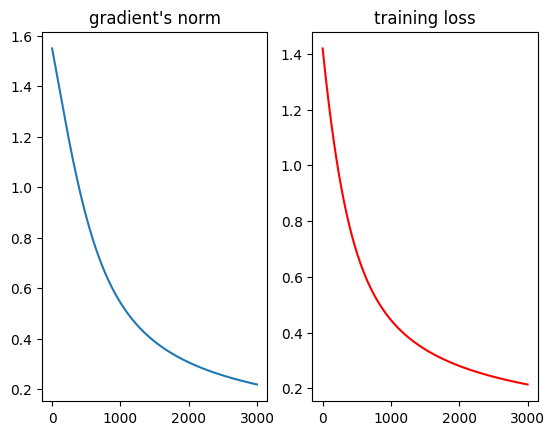

Test loss of softmax regression is 0.21947868197303977


In [19]:
four_metrics, grad, train, test = test_with_param(x_set, y_set)
print(four_metrics)
plt.subplot(1, 2, 1)
plt.title("gradient's norm")
plt.plot(grad)
plt.subplot(1, 2, 2)
plt.title("training loss")
plt.plot(train, color="red")
plt.show()
print("Test loss of softmax regression is {0}".format(test))

### Subtask 3.2: Test the performance of model using cross-validation

{'precision': 0.9326434359684981, 'recall': 0.917285123478672, 'f1': 0.9221017219937799, 'accuracy': 0.941836309312807}


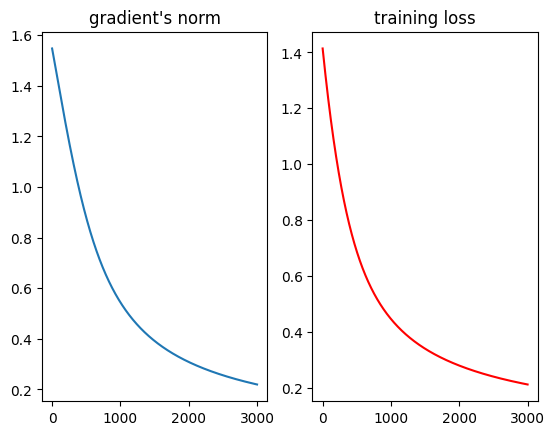

Test loss of softmax regression is 0.2702554424857716


In [20]:
four_metrics, grad, train, test = cross_validate(x_set, y_set)
# here, grad and train are average vectors
# that is, it's i-th entry is the average of all vectors' i-th entries
print(four_metrics)
plt.subplot(1, 2, 1)
plt.title("gradient's norm")
plt.plot(grad)
plt.subplot(1, 2, 2)
plt.title("training loss")
plt.plot(train, color="red")
plt.show()
print("Test loss of softmax regression is {0}".format(test))

### Subtask 3.3: Test the performance of model given different training set size

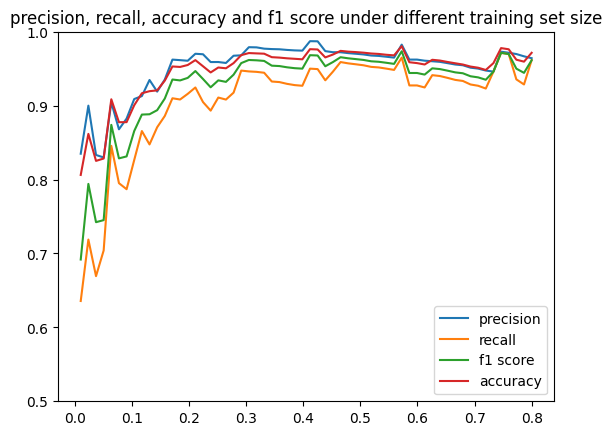

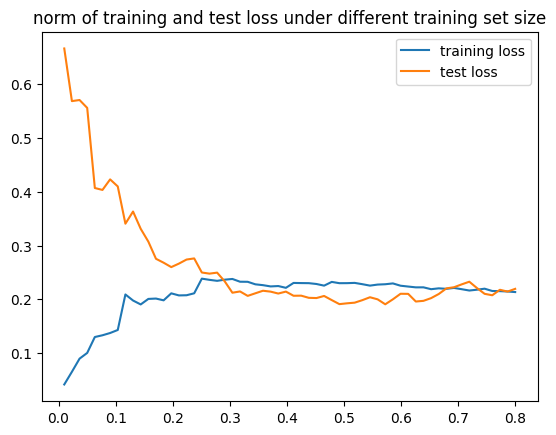

In [21]:
# for a better graph of the train loss - test loss curve, we started at 0.01 train set size
percentage_of_training = np.linspace(0.01, 0.8, num=60)
validation_scores = []
loss_on_train = []
loss_on_test = []
for p in percentage_of_training:
    four_metrics, _, train, test = test_with_param(x_set, y_set, p)
    validation_scores.append(four_metrics)
    loss_on_train.append(train[len(train) - 1])
    loss_on_test.append(test)

validation_precision = [item['precision'] for item in validation_scores]
validation_recall = [item['recall'] for item in validation_scores]
validation_f1 = [item['f1'] for item in validation_scores]
validation_accuracy = [item['accuracy'] for item in validation_scores]
plt.plot(percentage_of_training, validation_precision, label="precision")
plt.plot(percentage_of_training, validation_recall, label="recall")
plt.plot(percentage_of_training, validation_f1, label="f1 score")
plt.plot(percentage_of_training, validation_accuracy, label="accuracy")
ax = plt.gca()
ax.set_ylim([0.5, 1])
plt.legend(loc="lower right")
plt.title("precision, recall, accuracy and f1 score under different training set size")
plt.show()

plt.plot(percentage_of_training, loss_on_train, label="training loss")
plt.plot(percentage_of_training, loss_on_test, label="test loss")
plt.legend(loc="upper right")
plt.title("norm of training and test loss under different training set size")
plt.show()
# this is very similar to the 'underfit-overfit graph' we have seen on class

### Subtask 3.4: Test of convergence speed and performance of different batch sizes (SGD)

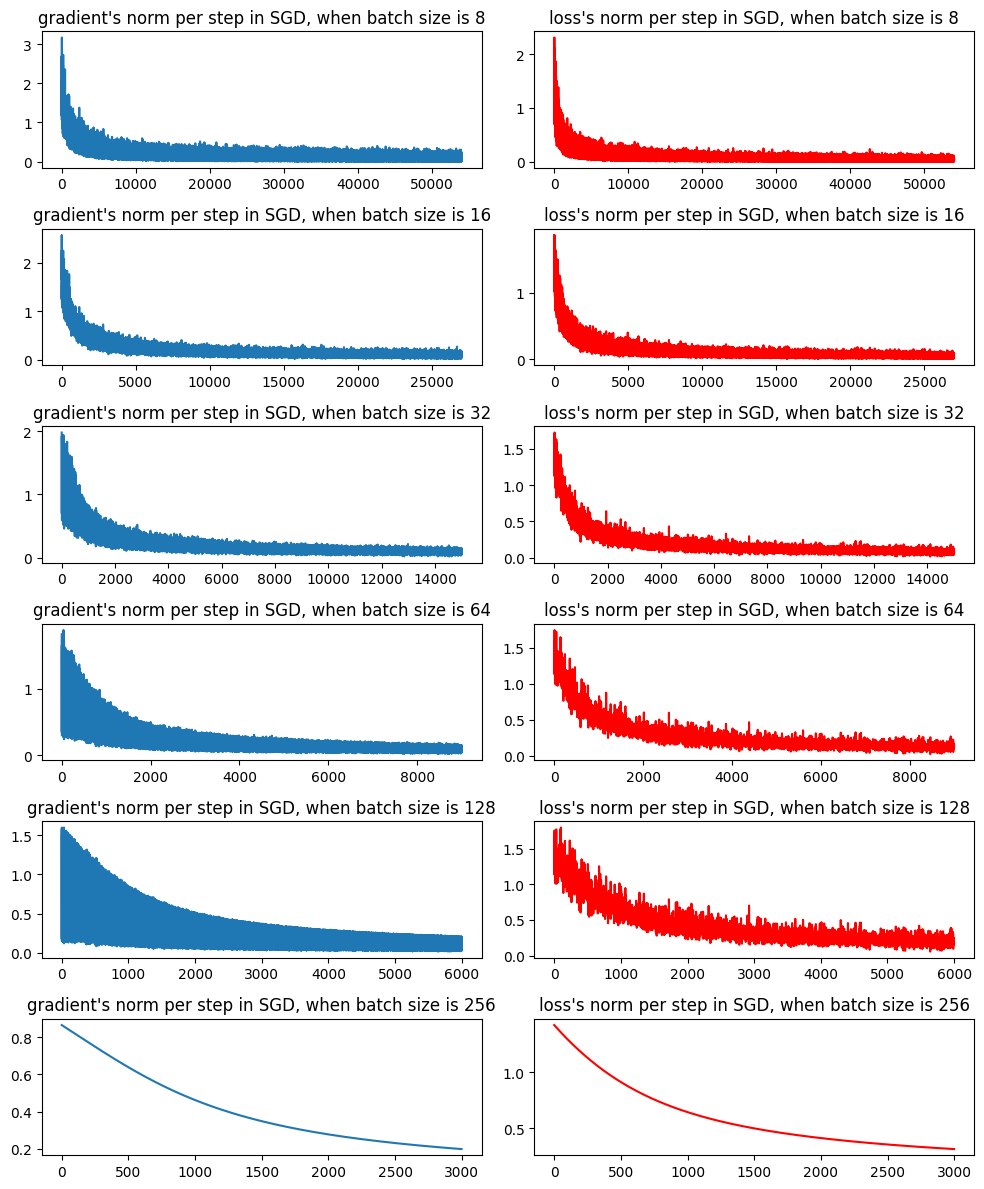

In [22]:
batchsizes = [2 ** i for i in range(3, 9)]
num_batches = len(batchsizes)
plt.figure(figsize=(10, 2 * num_batches))

for idx, b in enumerate(batchsizes):
    _, gradient, train, test = test_with_param(x_set, y_set, use_SGD=True, batchsize=b)

    plt.subplot(num_batches, 2, 2 * idx + 1)
    plt.plot(gradient)
    plt.title("gradient's norm per step in SGD, when batch size is {0}".format(b))

    plt.subplot(num_batches, 2, 2 * idx + 2)
    plt.plot(train, color="red")
    plt.title("loss's norm per step in SGD, when batch size is {0}".format(b))

plt.tight_layout()
plt.show()
# probably due to the simplicity of our model and the convexity of the loss function, GD here work the best
# note that minibatch with 2^8 = 256 size is just GD here as we only have 178 data

### Subtask 3.5: Test of performance under different learning rates

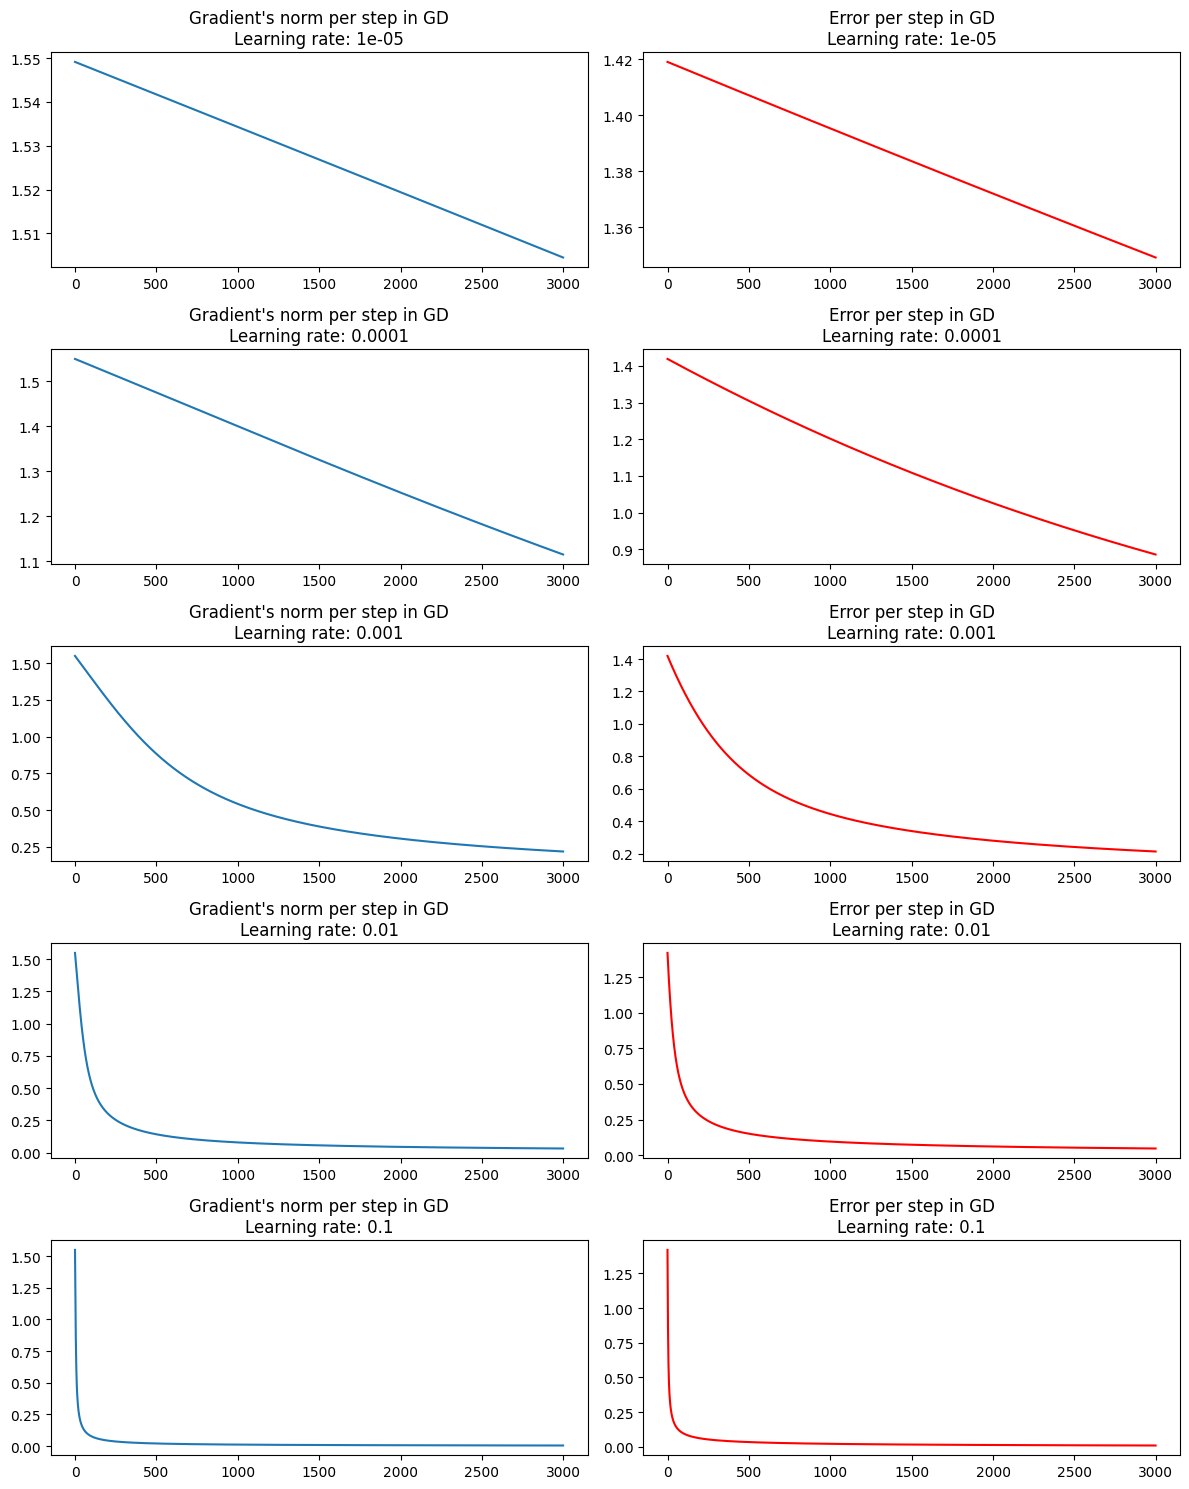

In [23]:
learning_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1]
num_lrs = len(learning_rates)
fig, axes = plt.subplots(num_lrs, 2, figsize=(12, 3 * num_lrs))

for idx, lr in enumerate(learning_rates):
    _, gradient, train, test = test_with_param(x_set, y_set, learning_rate=lr)
    axes[idx, 0].plot(gradient)
    axes[idx, 0].set_title("Gradient's norm per step in GD\nLearning rate: {0}".format(lr))
    axes[idx, 1].plot(train, color="red")
    axes[idx, 1].set_title("Error per step in GD\nLearning rate: {0}".format(lr))
plt.tight_layout()
plt.show()

### Subtask 3.6: Select appropriate metric and choose optimal parameter based on the metric

In [24]:
# add a table for parameter performances...
# batchsize and learning rate
# Use test loss and accuracy as the metrics:
from prettytable import PrettyTable

batchsizes = np.array([2 ** i for i in range(3, 9)])
learning_rates = np.array([0.00001, 0.0001, 0.001, 0.01, 0.1])

tests = np.zeros((len(batchsizes), len(learning_rates)))
accuracies = np.zeros((len(batchsizes), len(learning_rates)))
for i, b in enumerate(batchsizes):
    for j, lr in enumerate(learning_rates):
        four_metrics, _, _, test = test_with_param(x_set, y_set, use_SGD=True, batchsize=b, learning_rate=lr)
        tests[i, j] = test
        accuracies[i, j] = four_metrics["accuracy"]

testtable = PrettyTable()
testtable.field_names = ["", "1e-5", "1e-4", "0.001", "0.01", "0.1"]
for i, r in enumerate(tests):
    t_list = [batchsizes[i]] + r.tolist()
    testtable.add_row(t_list)
print(testtable)

accuracytable = PrettyTable()
accuracytable.field_names = ["", "1e-5", "1e-4", "0.001", "0.01", "0.1"]
for i, r in enumerate(accuracies):
    a_list = [batchsizes[i]] + r.tolist()
    accuracytable.add_row(a_list)
print(accuracytable)

# considering metrics shown in below table, we take batchsize=32, learning_rate=0.1 as the best parameter

+-----+--------------------+---------------------+----------------------+----------------------+----------------------+
|     |        1e-5        |         1e-4        |        0.001         |         0.01         |         0.1          |
+-----+--------------------+---------------------+----------------------+----------------------+----------------------+
|  8  | 0.6727701346745786 |  0.1473688977754106 | 0.037203706348328806 | 0.015342262169139469 | 0.017562085894977302 |
|  16 | 0.9315422114214377 | 0.23722029003405265 | 0.05465894438194928  | 0.017872663233265553 | 0.015840832062919294 |
|  32 | 1.1369134949204007 |  0.3801871207885965 | 0.08180318495057856  | 0.02332686668810695  | 0.014849971848928731 |
|  64 | 1.2655248130701664 |  0.5913553061571364 |  0.1269184181368026  | 0.032981072773901395 | 0.014968158143338425 |
| 128 | 1.3370704344780169 |  0.8508002356175078 |  0.2033087131729289  | 0.04821644197177999  | 0.016784343424851404 |
| 256 | 1.3747287939765056 |  1.07943626

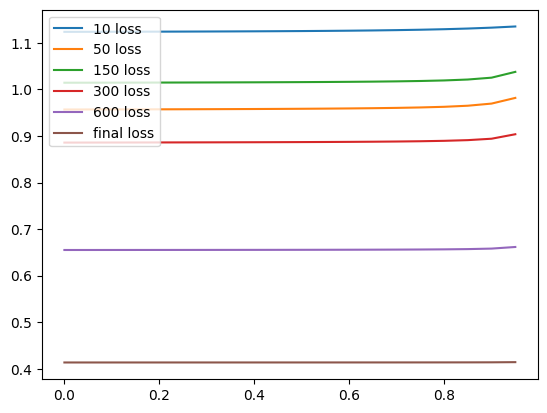

In [25]:
# here is an extra experiment on momentum

beta = np.linspace(0, 0.95, 20)
train_loss_on_10 = []
train_loss_on_50 = []
train_loss_on_150 = []
train_loss_on_300 = []
train_loss_on_600 = []
final_train_loss = []
totaltrain = []
for b in beta:
    _, _, train, test = test_with_param(x_set, y_set, use_SGD=True, momentum=b)
    totaltrain.append(train)
    train_loss_on_10.append(train[9])
    train_loss_on_50.append(train[49])
    train_loss_on_150.append(train[149])
    train_loss_on_300.append(train[299])
    train_loss_on_600.append(train[599])
    final_train_loss.append(train[999])

plt.plot(beta, train_loss_on_10, label="10 loss")
plt.plot(beta, train_loss_on_50, label="50 loss")
plt.plot(beta, train_loss_on_150, label="150 loss")
plt.plot(beta, train_loss_on_300, label="300 loss")
plt.plot(beta, train_loss_on_600, label="600 loss")
plt.plot(beta, final_train_loss, label="final loss")
plt.legend(loc="upper left")
plt.show()

# adding momentum has nearly no impact on the performance of our model
# why 150 loss is greater than 50 loss?

# The choice of optimal parameter:
# use GD, learning rate: 0.1, momemtum: 0